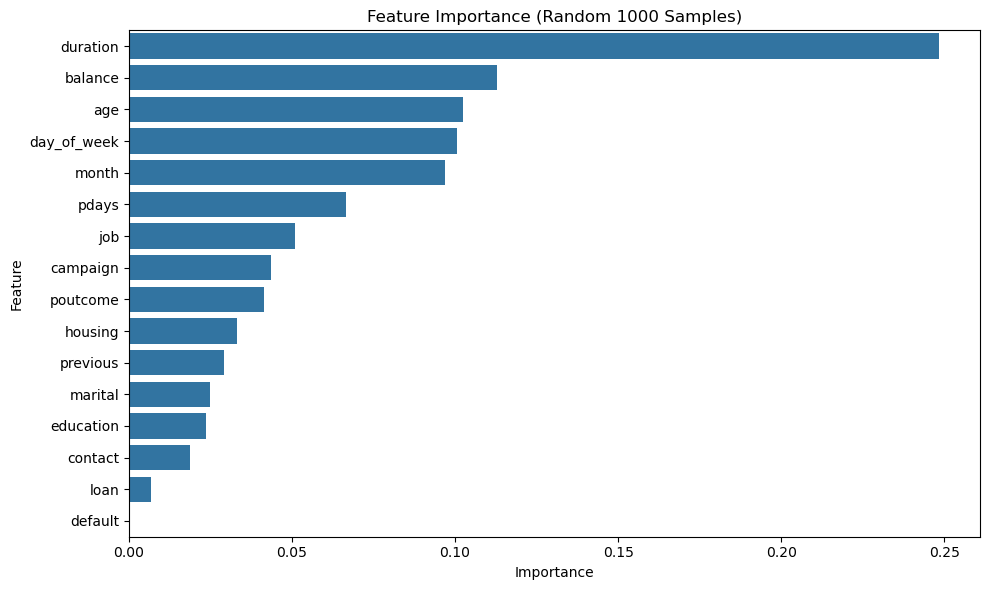

Top 10 Important Features:
        Feature  Importance
11     duration    0.248554
5       balance    0.112893
0           age    0.102375
9   day_of_week    0.100435
10        month    0.096992
13        pdays    0.066615
1           job    0.051032
12     campaign    0.043451
15     poutcome    0.041313
6       housing    0.033027


In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 导入数据
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# 2. 随机抽样1000条数据
np.random.seed(42)
sample_indices = np.random.choice(X.index, size=1000, replace=False)
X_sample = X.loc[sample_indices].copy()
y_sample = y.loc[sample_indices].copy()

# 3. 编码分类变量
X_encoded = X_sample.copy()
label_encoders = {}

for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# 编码目标变量
y_encoded = LabelEncoder().fit_transform(y_sample.values.ravel())

# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42
)

# 5. 随机森林训练
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. 获取特征重要性
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 7. 可视化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance (Random 1000 Samples)')
plt.tight_layout()
plt.show()

# 8. 打印前十重要特征
print("Top 10 Important Features:")
print(feature_importances.head(10))


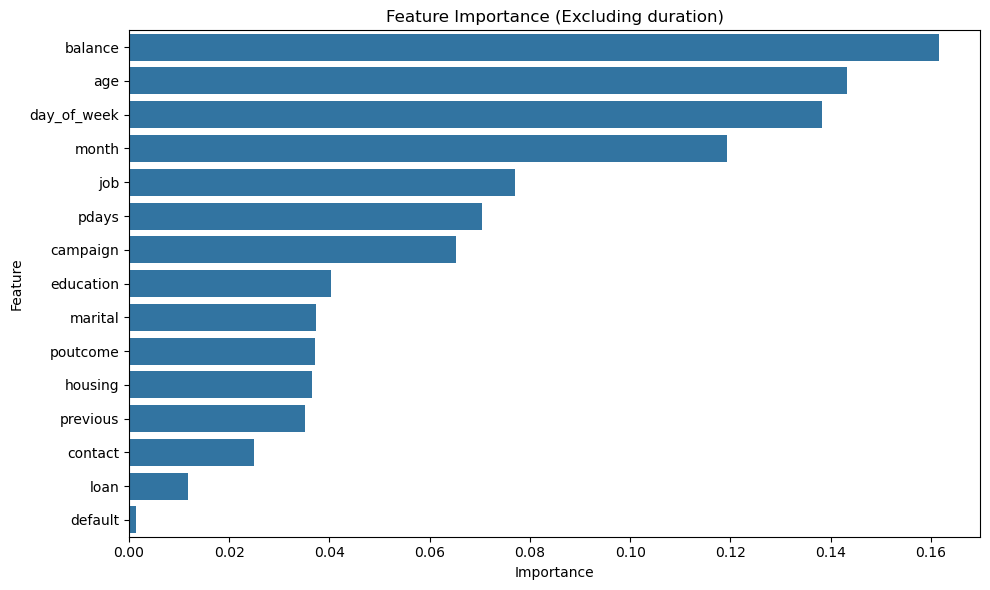

Top 10 Important Features (without duration):
        Feature  Importance
5       balance    0.161726
0           age    0.143344
9   day_of_week    0.138220
10        month    0.119250
1           job    0.077109
12        pdays    0.070436
11     campaign    0.065334
3     education    0.040389
2       marital    0.037335
14     poutcome    0.037114


In [2]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 导入数据
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# 2. 随机抽样1000条数据
np.random.seed(42)
sample_indices = np.random.choice(X.index, size=1000, replace=False)
X_sample = X.loc[sample_indices].copy()
y_sample = y.loc[sample_indices].copy()

# 3. 删除 duration 特征（因其无法在预测前获取）
if 'duration' in X_sample.columns:
    X_sample = X_sample.drop(columns=['duration'])

# 4. 编码分类变量
X_encoded = X_sample.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# 5. 编码目标变量
y_encoded = LabelEncoder().fit_transform(y_sample.values.ravel())

# 6. 分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42
)

# 7. 训练随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 8. 提取特征重要性
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 9. 可视化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance (Excluding duration)')
plt.tight_layout()
plt.show()

# 10. 输出 Top 10
print("Top 10 Important Features (without duration):")
print(feature_importances.head(10))


很好！你选择的这两个方向——**影响因素分析**和**公平性分析**——不仅有理论深度，而且对实际银行营销策略具有极强的指导价值。下面我来为你分别设计两个研究的详细方案，包括数据处理思路、推荐算法、可视化方式，以及可以使用的评估指标：

---

## ✅ 研究三：影响因素分析（Feature Importance）

### 🎯 目标：

识别哪些变量对客户是否订阅定期存款（`y`）的影响最大，解释这些影响的业务含义。

### 🛠 方法建议：

| 方法        | 技术/工具          | 说明                                  |
| --------- | -------------- | ----------------------------------- |
| 1️⃣ 基线模型  | 逻辑回归           | 利用权重系数评估变量重要性（适用于线性影响）              |
| 2️⃣ 树模型   | 随机森林 / XGBoost | `feature_importances_` 反映变量对模型决策的贡献 |
| 3️⃣ 黑箱解释  | SHAP 值         | 可解释复杂模型每个变量在每个样本上的作用                |
| 4️⃣ 敏感性分析 | 单变量逐个扰动        | 观察每个变量变化对预测概率的影响趋势                  |

### 📊 可视化：

* 条形图展示特征重要性排名
* SHAP Summary Plot（变量影响力分布）
* PDP图（Partial Dependence Plot）查看如 `duration` 等变量的影响曲线

### 📌 特别注意：

* `duration` 虽然重要，但它是“通话时间”，模型部署前**无法提前得知**，应慎用。
* `pdays`, `campaign`, `previous` 等“营销行为变量”可能存在顺序偏倚。

---

## ✅ 研究五：公平性分析（Fairness in ML）

### 🎯 目标：

确保预测模型不会对特定群体（如某种婚姻状态、教育水平、性别或年龄）产生系统性偏差。

### 🎯 核心问题：

* 模型是否对不同群体给出不同的预测概率？
* 某些群体是否被过度预测为“不订阅”？

### 🛠 分析变量建议（敏感变量）：

| 变量          | 类别       | 分析理由                      |
| ----------- | -------- | ------------------------- |
| `marital`   | 离婚/已婚/单身 | 婚姻状态是否影响模型倾向              |
| `education` | 不同学历层级   | 教育差异是否影响预测信任度             |
| `job`       | 各职业      | 职业偏见分析（如技术员/蓝领）           |
| `age`       | 连续变量     | 可以进行分组（如 ≤30, 30–60, >60） |

### 🛠 公平性评估指标：

| 指标                     | 含义                      |
| ---------------------- | ----------------------- |
| Demographic Parity     | 不同群体获得正类预测的概率是否相近       |
| Equal Opportunity      | 条件在真实为正时，各群体预测为正的概率是否相同 |
| Disparate Impact Ratio | 预测为“订阅”的少数群体比例 / 多数群体比例 |
| TPR, FPR 差值            | 不同群体的真正率、假正率差异分析        |

### 📊 可视化建议：

* 每个敏感变量组的预测分布柱状图
* 混淆矩阵对比（按群体分开）
* SHAP值分群分析（不同群体对同一变量是否有不同敏感性）

---

## 🧪 实操方案建议（融合两个研究）

```python
# 特征重要性（随机森林）
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

# 公平性评估
from sklearn.metrics import confusion_matrix
for group in sensitive_attr_groups:
    idx = data[sensitive_attr] == group
    y_pred_group = model.predict(X[idx])
    cm = confusion_matrix(y_true[idx], y_pred_group)
    # 输出每个群体的TPR, FPR

# SHAP 分析
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[1], X)  # 类别1为“yes”预测的解释力
```

---

## 🧩 下一步可以怎么做：

* 如果你已经准备好数据（例如 `bank-additional-full.csv`），我可以帮你写完整的数据处理和分析代码；
* 或者你也可以告诉我你更感兴趣的是哪一部分（模型建立、可视化、解释、论文结构设计），我会进一步拆解。

👉 要不要我们现在就从某个变量开始，比如看一看 `duration`, `pdays`, `marital` 对模型有多大影响？还是先跑个基础模型提取特征重要性？你决定节奏，我来配合推进。


In [4]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# 1. 加载数据
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# 2. 随机抽样1000条
np.random.seed(42)
sample_indices = np.random.choice(X.index, size=1000, replace=False)
X_sample = X.loc[sample_indices].copy()
y_sample = y.loc[sample_indices].copy()

# 3. 删除 duration 特征
if 'duration' in X_sample.columns:
    X_sample = X_sample.drop(columns=['duration'])

# 4. 编码所有分类变量
X_encoded = X_sample.copy()
label_encoders = {}
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# 编码目标变量
y_encoded = LabelEncoder().fit_transform(y_sample.values.ravel())

# 5. 训练测试集划分
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42
)

# 6. 模型训练
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. 模型预测
y_pred = rf.predict(X_test)

# 8. 提取原始 marital 信息（未编码）
marital_raw = X_sample['marital'].reset_index(drop=True)
marital_test = marital_raw.loc[X_test.index]

# 9. 计算 Demographic Parity
demographic_parity = (
    pd.DataFrame({'marital': marital_test, 'prediction': y_pred})
    .groupby('marital')
    .agg(Predicted_Positive_Rate=('prediction', 'mean'), Sample_Count=('prediction', 'count'))
    .reset_index()
)

print("🔎 Demographic Parity 分析结果（按婚姻状态）")
print(demographic_parity)


KeyError: '[26003, 40225, 3715, 24523, 15953, 6308, 14680, 28385, 23068, 30915, 24463, 10460, 21016, 5370, 25626, 30695, 3154, 41317, 13312, 15521, 21585, 39157, 20915, 27442, 38410, 27854, 8510, 42219, 30165, 2269, 28994, 23835, 13759, 1703, 26378, 27234, 10963, 14773, 25690, 11839, 44621, 7680, 35533, 5893, 41864, 33833, 9225, 31252, 12216, 20283, 45077, 43738, 11034, 6427, 25353, 30162, 34145, 44415, 4831, 33479, 12341, 44390, 42221, 40030, 27338, 41937, 3939, 29716, 19766, 41033, 6623, 40493, 12257, 5864, 3263, 37863, 30141, 18956, 40134, 21013, 35979, 21798, 13941, 24337, 14829, 7191, 2059, 30999, 7678, 25789, 35164, 22367, 7540, 9205, 5847, 26618, 31920, 10264, 14976, 40611, 35793, 18314, 38329, 12422, 22653, 22823, 28345, 38323, 26674, 39910, 32610, 43979, 12484, 33553, 29569, 30221, 28728, 23593, 14576, 33526, 2644, 36720, 3555, 36692, 12229, 36950, 8902, 30227, 7220, 27545, 29675, 30039, 37301, 2729, 38857, 36955, 29579, 43066, 36399, 21680, 23796, 43288, 44912, 2616, 40497, 22786, 42908, 33253, 9902, 25219, 21565, 5707, 22590, 44106, 11128, 43178, 23079, 5576, 15809, 7563, 10653, 29650, 12793, 38867, 19205, 30589, 43064, 15331, 22811, 13433, 15789, 24851, 44217, 24708, 20699, 9270, 36120, 7989, 10873, 4832, 30136, 22872, 28877, 5907, 44100, 40421, 25754, 26050, 22405, 37322, 34760, 22954, 23734, 32108, 40429, 2055, 6757, 24179, 43887, 7431, 45179, 2624, 6245, 24185, 24684, 26528, 21620, 25910, 11105, 1736, 13738, 26317, 35449, 38851, 35207, 43171, 16033, 10755, 9604, 41233, 33409, 33940, 32237, 2791, 7609, 18552, 9527, 33884, 42211, 19138, 25609, 20397, 36588, 9538, 7911, 31885, 23417, 9398, 5199, 34292, 13399, 16675, 17398, 42354, 28108, 9134, 2527, 20930, 37369, 39423, 17437, 10927, 44228, 19367, 30813, 17224, 19452, 34226, 41018, 21489, 10881, 13301, 33375, 24946, 32614, 43894, 17298, 36036, 18899, 25134, 11930, 16922, 19263, 39490, 14238, 22599, 10259, 29830, 23890, 24023, 10962, 10491, 9137, 8877, 34476, 34954, 44758, 7360, 13177, 21093, 36778, 43774, 31382, 34204] not in index'

In [6]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 1. 加载数据集
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# 2. 随机抽样1000条
np.random.seed(42)
sample_indices = np.random.choice(X.index, size=1000, replace=False)
X_sample = X.loc[sample_indices].copy()
y_sample = y.loc[sample_indices].copy()

# 3. 删除 duration（通话时长，不可预测前获知）
if 'duration' in X_sample.columns:
    X_sample = X_sample.drop(columns=['duration'])

# 4. 提取敏感变量（原始婚姻状态）
sensitive_marital = X_sample['marital'].copy()

# 5. 编码 X 特征
X_encoded = X_sample.copy()
label_encoders = {}
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# 6. 编码 y
y_encoded = LabelEncoder().fit_transform(y_sample.values.ravel())

# 7. 添加敏感变量列（保持顺序）
X_encoded['marital_raw'] = sensitive_marital.values

# 8. 拆分训练与测试数据
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded.drop(columns=['marital_raw']),
    y_encoded,
    test_size=0.3,
    random_state=42
)

# 9. 同步提取敏感变量 test 列
marital_test = X_encoded['marital_raw'].iloc[X_test.index]

# 10. 训练随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 11. 预测
y_pred = rf.predict(X_test)

# 12. 计算 Demographic Parity
demographic_parity = (
    pd.DataFrame({'marital': marital_test.values, 'prediction': y_pred})
    .groupby('marital')
    .agg(Predicted_Positive_Rate=('prediction', 'mean'), Sample_Count=('prediction', 'count'))
    .reset_index()
)

# 13. 输出结果
print("\n🔎 Demographic Parity 分析结果（按婚姻状态）")
print(demographic_parity)


IndexError: positional indexers are out-of-bounds